```
Train Data of Housing Price Prediction
1460 x 81<-- Train Data
38 Numeric Variables <-- Including SalePrice Response Variable
43 Categorical Variables
out of 38 Numberical Variables-> In Train Set,3 columns  have missing data of about 17%, 5% and 0.05%.
In this Kernel, Dropped the 3 Numerical Columns with Mising Data from Train data 
In test Data , fillna is used for handling missing numerical values.
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_data = pd.read_csv("train.csv")

In [3]:
test_data = pd.read_csv("test.csv")

In [4]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
train_data.select_dtypes(include='object').columns #43 Columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [8]:
train_data.select_dtypes(exclude='object').columns #38 Columns Numeric

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [9]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [13]:
test_data.shape,train_data.shape

((1459, 80), (1460, 81))

In [16]:
#COncatenating the Train and Test Data,so it the changes or transformation will be consistent
all_data = pd.concat((train_data, test_data)).reset_index(drop=True)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [19]:
all_data.shape

(2919, 81)

In [258]:
train_data['SalePrice'] = np.log1p(train_data['SalePrice'])
y_train = train_data['SalePrice']

In [27]:
all_data.drop(('Id','SalePrice'),axis=1,inplace=True)

In [29]:
all_data.shape

(2919, 79)

In [37]:
(all_data.isnull().sum() / len(all_data) * 100).sort_values(ascending=False)[:34]

PoolQC          99.657417
MiscFeature     96.402878
Alley           93.216855
Fence           80.438506
FireplaceQu     48.646797
LotFrontage     16.649538
GarageFinish     5.447071
GarageQual       5.447071
GarageYrBlt      5.447071
GarageCond       5.447071
GarageType       5.378554
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtQual         2.774923
BsmtFinType2     2.740665
BsmtFinType1     2.706406
MasVnrType       0.822199
MasVnrArea       0.787941
MSZoning         0.137033
BsmtHalfBath     0.068517
Utilities        0.068517
Functional       0.068517
BsmtFullBath     0.068517
Electrical       0.034258
Exterior2nd      0.034258
KitchenQual      0.034258
GarageCars       0.034258
Exterior1st      0.034258
GarageArea       0.034258
TotalBsmtSF      0.034258
BsmtUnfSF        0.034258
BsmtFinSF2       0.034258
BsmtFinSF1       0.034258
SaleType         0.034258
dtype: float64

In [45]:
#Treating the Missing Values:- Look at the related Features together. if most of the data os missing,
#Can use None for Categorical and 0 for Numerical data.
#else can fill with Mean (Numerical) or mode(Categorical)
# If any column value is constant or not available in Test data, can remove that as well.
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [46]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [47]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
    

all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)


In [48]:
all_data = all_data.drop(['Utilities'], axis=1)
all_data["Functional"] = all_data["Functional"].fillna("Typ")


In [49]:
all_data.shape

(2919, 78)

In [53]:
#((all_data.isnull().sum()/len(all_data))*100).sort_values(ascending=False)
all_data.isnull().sum().any()

False

In [58]:
#Transforming some Numerical Data that is actually categorical
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [76]:
#Label Encoding some categorical variables that may contain information in their ordering set
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2919, 78)


In [77]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [78]:
all_data.shape

(2919, 79)

In [80]:
#Skewness Treatment
from scipy.stats import skew
num_features = all_data.dtypes[all_data.dtypes != "object"].index
skewed_feat = all_data[num_features].apply(lambda x:skew(x)).sort_values(ascending=False)
skewed_feat = skewed_feat[abs(skewed_feat) > 0.75]
all_data[skewed_feat.index] = np.log1p(all_data[skewed_feat.index])

In [114]:
#Converting categorical variables
all_data = pd.get_dummies(all_data)

In [115]:
all_data.shape

(2919, 221)

In [117]:
ntrain = train_data.shape[0]
ntest = test_data.shape[0]

In [118]:
ntrain,ntest

(1460, 1459)

In [119]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [120]:
train.shape,test.shape

((1460, 221), (1459, 221))

In [121]:
#train_data.corr()['SalePrice'].sort_values(ascending = False)# Corr() can only be checked for continous variables.
# for cateforical variables, it needs to be encoded before corr() can be applied.
# but then the number of features will increase.

#Used in previous cases.This time observed the columsn and imputed.

from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)


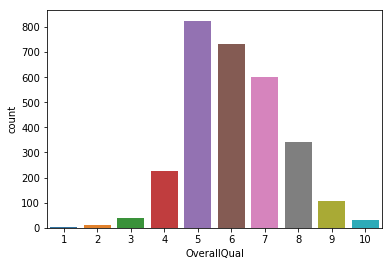

In [122]:
sns.countplot(all_data['OverallQual'])

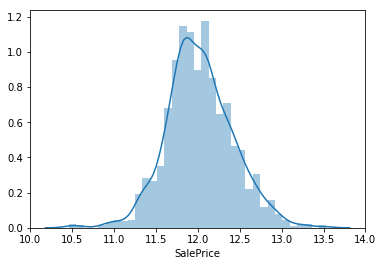

In [304]:
sns.distplot(train_data['SalePrice'])

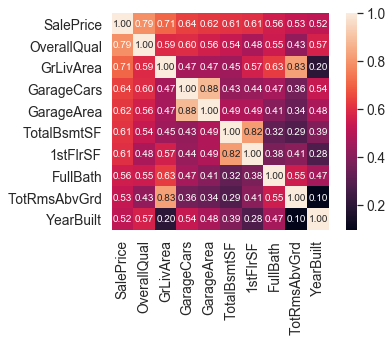

In [249]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = train_num.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_num[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

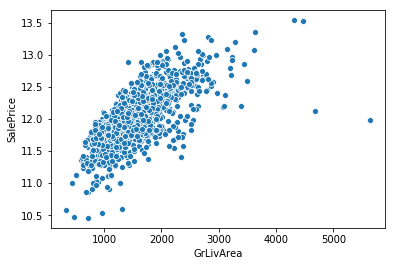

In [305]:
sns.scatterplot(x=train_data['GrLivArea'],y=train_data['SalePrice'])

In [271]:
#Validation function
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error,mean_squared_log_error
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [208]:
from sklearn.linear_model import LinearRegression

In [209]:
LR = LinearRegression()

In [210]:
Lin_fit = LR.fit(train,y_train)

In [211]:
LR_Predict = Lin_fit.predict(test)

In [212]:
LR_Predict = pd.Series(LR_Predict)

In [213]:
LR_Predict.head()

0    120701.115038
1    159481.797825
2    177392.056820
3    178861.009812
4    219311.823022
dtype: float64

In [214]:
score = rmsle_cv(LR)
print("\nLR score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


LR score: 0.1367 (0.0160)



In [ ]:
LR_Model = pd.concat([test_data['Id'],LR_Predict],axis=1)
LR_Model.columns = ['Id','SalePrice']
LR_Model.to_csv('/Users/ankitgupta/Sonam/Kaggle-Competitions/Housing_Predictions/LR_Improve.csv',index=False)

In [215]:
from sklearn.ensemble import RandomForestRegressor

In [216]:
RF = RandomForestRegressor()

In [217]:
RF_Fit = RF.fit(train,y_train)

/usr/local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [218]:
RF_Predict = RF_Fit.predict(test)

In [219]:
RF_Predict = pd.Series(RF_Predict)

In [220]:
score = rmsle_cv(RF)
print("\nRF score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


RF score: 0.1551 (0.0107)



In [ ]:
RF_Model = pd.concat([test_data['Id'],RF_Predict],axis=1)
RF_Model.columns = ['Id','SalePrice']
RF_Model.to_csv('/Users/ankitgupta/Sonam/Kaggle-Competitions/Housing_Predictions/RF_Improve.csv',index=False)

In [221]:
from sklearn.ensemble import GradientBoostingRegressor

In [222]:
GBR = GradientBoostingRegressor(n_estimators=3000)

In [223]:
GBR_Fit = GBR.fit(train,y_train)

In [224]:
GBR_Predict = GBR_Fit.predict(test)

In [226]:
GBR_Predict = pd.Series(GBR_Predict)

(numpy.ndarray, numpy.ndarray)

In [227]:
score = rmsle_cv(GBR)
print("\nGBR score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


GBR score: 0.1245 (0.0092)



In [ ]:
GBR_Model = pd.concat([test_data['Id'],GBR_Predict],axis=1)
GBR_Model.columns = ['Id','SalePrice']
GBR_Model.to_csv('/Users/ankitgupta/Sonam/Kaggle-Competitions/Housing_Predictions/GBR_Improve.csv',index=False)

In [264]:
from xgboost import XGBRegressor

In [265]:
xgb = XGBRegressor(n_estimators=3000)

In [266]:
xgb_fit = xgb.fit(train,y_train)

In [267]:
xgb_Predict = xgb_fit.predict(test)

In [281]:
xgb_Predict = pd.Series(xgb_Predict)
xgb_Predict = np.expm1(xgb_Predict)

In [272]:
score = rmsle_cv(xgb)
print("\nxgb score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


xgb score: 0.1220 (0.0116)



In [ ]:
XGB_Model = pd.concat([test_data['Id'],xgb_Predict],axis=1)
XGB_Model.columns = ['Id','SalePrice']
XGB_Model.to_csv('/Users/ankitgupta/Sonam/Kaggle-Competitions/Housing_Predictions/XGB_Improve.csv',index=False)

In [185]:
Mix_Predict = (GBR_Predict*0.9 + xgb_Predict*0.1)

In [ ]:
Mix_Model = pd.concat([test_data['Id'],Mix_Predict],axis=1)
Mix_Model.columns = ['Id','SalePrice']
Mix_Model.to_csv('/Users/ankitgupta/Sonam/Kaggle-Competitions/Housing_Predictions/GBR_XGB_Improve.csv',index=False)

In [169]:
from sklearn.linear_model import LassoCV

In [170]:
LCV = LassoCV(alphas=[0.1,0.01,0.001,1,10,100,1000,0.0005,0.0001, 0.0003, 0.0006,0.003, 0.006, 0.03, 0.06,
                      0.3, 0.6,],max_iter=50000,cv=10)

In [171]:
LCV_FIT = LCV.fit(train,y_train)

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

In [172]:
LCV_PREDICT = LCV_FIT.predict(test)

In [173]:
LCV_PREDICT = pd.Series(LCV_PREDICT)

In [ ]:
LCV_Model = pd.concat([test_data['Id'],LCV_PREDICT],axis=1)
LCV_Model.columns = ['Id','SalePrice']
LCV_Model.to_csv('/Users/ankitgupta/Sonam/Kaggle-Competitions/Housing_Predictions/LCV_Improve.csv',index=False)

In [174]:
score = rmsle_cv(LCV)
print("\nLR score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


LR score: 0.1238 (0.0161)



Stacking:

In [276]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
#import lightgbm as lgb
import xgboost as XGBOOST

In [277]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)


In [278]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)


In [279]:
model_xgb = XGBOOST.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [197]:
#Base Models:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1230 (0.0155)



In [198]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1230 (0.0156)



In [199]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1639 (0.0123)



In [200]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1248 (0.0129)



In [201]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1216 (0.0089)



In [229]:
model_xgb_fit = model_xgb.fit(train,y_train)
model_xgb_pred = model_xgb_fit.predict(test)
model_xgb_pred = pd.Series(model_xgb_pred)
model_xgb_pred = np.expm1(model_xgb_pred)
XGB_MODEL2 = pd.concat([test_data['Id'],model_xgb_pred],axis=1)
XGB_MODEL2.columns = ['Id','SalePrice']
XGB_MODEL2.to_csv('/Users/ankitgupta/Sonam/Kaggle-Competitions/Housing_Predictions/XGB_Improve_2.csv',index=False)

In [238]:
Lasso_fit = lasso.fit(train,y_train)
Lasso_pred = Lasso_fit.predict(test)
Lasso_pred = pd.Series(Lasso_pred)
Lasso_pred = np.expm1(Lasso_pred)
LASSO2 = pd.concat([test_data['Id'],Lasso_pred],axis=1)
LASSO2.columns = ['Id','SalePrice']
LASSO2.to_csv('/Users/ankitgupta/Sonam/Kaggle-Competitions/Housing_Predictions/Lasso_Improve_2.csv',index=False)

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [239]:
Enet_fit = ENet.fit(train,y_train)
Enet_pred = Enet_fit.predict(test)
Enet_pred = pd.Series(Enet_pred)
Enet_pred = np.expm1(Enet_pred)
ENET_MODEL = pd.concat([test_data['Id'],Enet_pred],axis=1)
ENET_MODEL.columns = ['Id','SalePrice']
ENET_MODEL.to_csv('/Users/ankitgupta/Sonam/Kaggle-Competitions/Housing_Predictions/ENET_IMPROVE.csv',index=False)

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [240]:
KRR_fit = KRR.fit(train,y_train)
KRR_pred = KRR_fit.predict(test)
KRR_pred = pd.Series(KRR_pred)
KRR_pred = np.expm1(KRR_pred)
KRR_MODEL = pd.concat([test_data['Id'],KRR_pred],axis=1)
KRR_MODEL.columns = ['Id','SalePrice']
KRR_MODEL.to_csv('/Users/ankitgupta/Sonam/Kaggle-Competitions/Housing_Predictions/KRR_IMPROVE.csv',index=False)

Stacking:
Averaged Models
using Validation set

In [283]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [284]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1231 (0.0158)



In [250]:
avg_model_fit = averaged_models.fit(train,y_train)

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [254]:
avg_model_pred = avg_model_fit.predict(test)
avg_model_pred = pd.Series(avg_model_pred)
avg_model_pred = np.expm1(avg_model_pred)
AVG_MODEL = pd.concat([test_data['Id'],avg_model_pred],axis=1)
AVG_MODEL.columns = ['Id','SalePrice']
AVG_MODEL.to_csv('/Users/ankitgupta/Sonam/Kaggle-Competitions/Housing_Predictions/AVG_STK_IMPROVE.csv',index=False)

In [255]:
np.sqrt(mean_squared_log_error(y_train,avg_model_fit.predict(train)))

0.09089122574244206

In [285]:
#for Stacked Average Model:

class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [287]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

#score = rmsle_cv(stacked_averaged_models)
#print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

In [290]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))


In [292]:
stacked_pred = pd.Series(stacked_pred)

In [293]:
STK_MODEL = pd.concat([test_data['Id'],stacked_pred],axis=1)
STK_MODEL.columns = ['Id','SalePrice']
STK_MODEL.to_csv('/Users/ankitgupta/Sonam/Kaggle-Competitions/Housing_Predictions/STK.csv',index=False)

In [294]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
xgb_pred = pd.Series(xgb_pred)


In [295]:
XGB_MODEL2 = pd.concat([test_data['Id'],model_xgb_pred],axis=1)
XGB_MODEL2.columns = ['Id','SalePrice']
XGB_MODEL2.to_csv('/Users/ankitgupta/Sonam/Kaggle-Competitions/Housing_Predictions/XGB_Improve_2.csv',index=False)

In [301]:
#import lightgbm as lgb

In [302]:
ensemble = stacked_pred*0.80 + xgb_pred*0.20

In [303]:
Ensemble_Model = pd.concat([test_data['Id'],ensemble],axis=1)
Ensemble_Model.columns = ['Id','SalePrice']
Ensemble_Model.to_csv('/Users/ankitgupta/Sonam/Kaggle-Competitions/Housing_Predictions/Ensemble.csv',index=False)